In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
train_path = 'E:\8th semester\CSE 4000 Thesis or Project\Dataset\disease_data\Train'
valid_path = 'E:\8th semester\CSE 4000 Thesis or Project\Dataset\disease_data\Val'
test_path = 'E:\8th semester\CSE 4000 Thesis or Project\Dataset\disease_data\Test'

In [3]:
# Define image dimensions and batch size
img_size = (224, 224)
batch_size = 32

In [4]:
# Create data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11951 images belonging to 22 classes.


In [6]:
# Create data generators without augmentation for validation and test data
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1495 images belonging to 22 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1497 images belonging to 22 classes.


In [9]:
# Load MobileNetV2 base model with pre-trained weights
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


In [10]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Create a custom model on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
trainData = tf.keras.preprocessing.image_dataset_from_directory('E:\8th semester\CSE 4000 Thesis or Project\Dataset\disease_data\Train')

Found 11951 files belonging to 22 classes.


In [14]:
for image_batch, labels_batch in trainData.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[ 3 15  8 20  1  2 10 16 13  8  9 18  7 20 19  8 14 16 16 16 15 14 13 11
 16 20 10 10 21 19 11 11]


In [15]:
for image_batch, labels_batch in trainData.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [16]:
class_names = trainData.class_names
class_names

['Bean_angular_leaf_spot',
 'Bean_bean_rust',
 'Cauliflower_Alternaria_Leaf_Spot',
 'Cauliflower_Black_Rot',
 'Cauliflower_Cabbage aphid colony',
 'Cauliflower_Downy_Mildew',
 'Cauliflower_ring spot',
 'Paddy_Bacterial leaf blight',
 'Paddy_Brown spot',
 'Paddy_Leaf smut',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [56]:
import matplotlib.pyplot as plt


In [23]:
plt.figure(figsize = (12,10))
for image_batch, labels_batch in trainData.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [24]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,  # adjust as needed
    validation_data=valid_generator
)

Epoch 1/50
374/374 [==============================] - 751s 2s/step - loss: 1.3696 - accuracy: 0.5640 - val_loss: 0.6647 - val_accuracy: 0.7860
Epoch 2/50
374/374 [==============================] - 537s 1s/step - loss: 0.7711 - accuracy: 0.7389 - val_loss: 0.5001 - val_accuracy: 0.8381
Epoch 3/50
374/374 [==============================] - 545s 1s/step - loss: 0.6586 - accuracy: 0.7766 - val_loss: 0.4834 - val_accuracy: 0.8294
Epoch 4/50
374/374 [==============================] - 535s 1s/step - loss: 0.5880 - accuracy: 0.8016 - val_loss: 0.3917 - val_accuracy: 0.8669
Epoch 5/50
374/374 [==============================] - 538s 1s/step - loss: 0.5432 - accuracy: 0.8172 - val_loss: 0.3471 - val_accuracy: 0.8829
Epoch 6/50
374/374 [==============================] - 534s 1s/step - loss: 0.4967 - accuracy: 0.8270 - val_loss: 0.3212 - val_accuracy: 0.8903
Epoch 7/50
374/374 [==============================] - 541s 1s/step - loss: 0.4755 - accuracy: 0.8382 - val_loss: 0.3015 - val_accuracy: 0.8943

In [25]:
# Save the model if needed
model.save("custom_cnn_transfer_learning_model.h5")

C:\Users\RASEL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
trainData = tf.keras.preprocessing.image_dataset_from_directory('E:\8th semester\CSE 4000 Thesis or Project\Dataset\disease_data\Train')

Found 11951 files belonging to 22 classes.


In [28]:
# Evaluate the model on a test dataset if available
test_generator = test_datagen.flow_from_directory(
    'E:\8th semester\CSE 4000 Thesis or Project\Dataset\disease_data\Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1497 images belonging to 22 classes.


In [29]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 [==============================] - 55s 1s/step - loss: 0.1323 - accuracy: 0.9593
Test Accuracy: 95.93%


In [30]:
testData = tf.keras.preprocessing.image_dataset_from_directory('E:\8th semester\CSE 4000 Thesis or Project\Dataset\disease_data\Test')

Found 1497 files belonging to 22 classes.


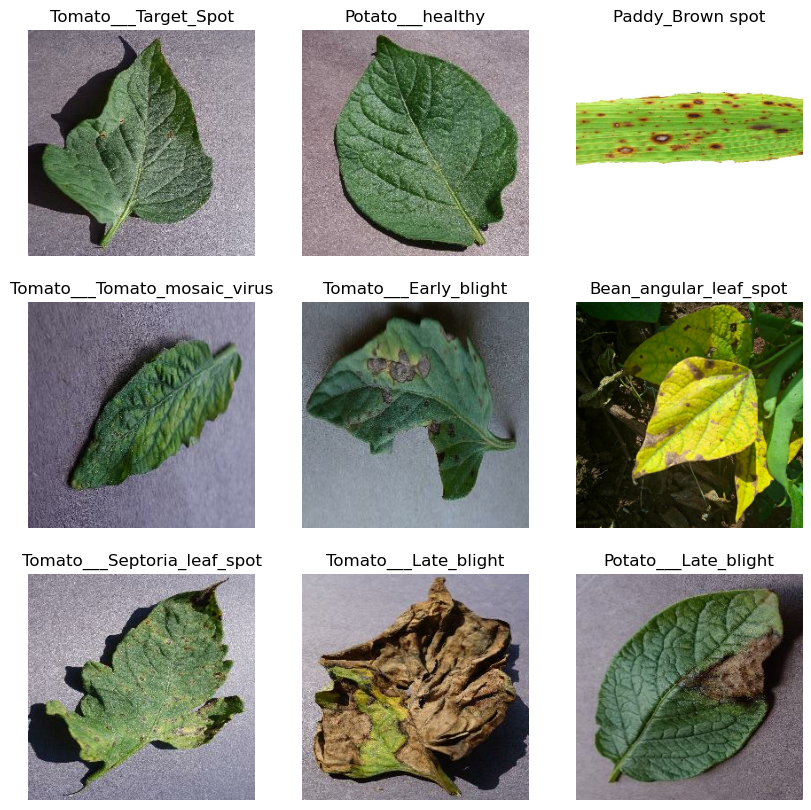

In [31]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in testData.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['accuracy']
val_loss = history.history['val_loss']

In [33]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

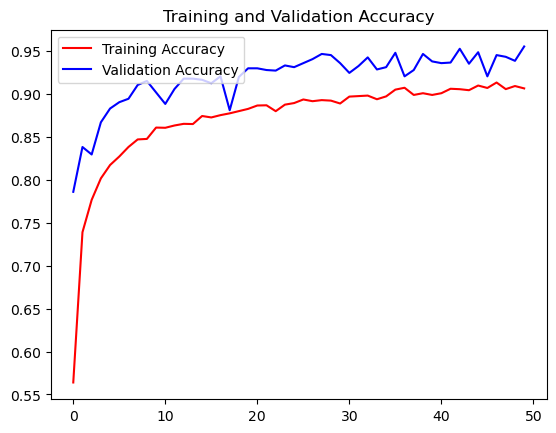

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Traning Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'upper left')
plt.figure()


plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation  Loss")
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')

plt.title('Training and validation loss')

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
#Make predictions
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

47/47 [==============================] - 42s 893ms/step


In [63]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

In [64]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.05      0.04        44
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00        44
           9       0.02      0.02      0.02        45
          10       0.07      0.07      0.07       100
          11       0.10      0.10      0.10       100
          12       0.00      0.00      0.00        16
          13       0.05      0.05      0.05       100
          14       0.10      0.10      0.10       100
          15       0.11      0.10      0.10       100
          16       0.05      0.05      0.05       100
    

In [65]:
# Plot confusion matrix
class_names = test_generator.class_indices.keys()

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Confusion Matrix')

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    new_image = img_array / 255.0  # Normalize the image
    
    predictions = model.predict(np.expand_dims(new_image, axis=0))
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    #predictions = model.predict(img_array)

    #predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

1/1 [==============================] - 0s 56ms/step


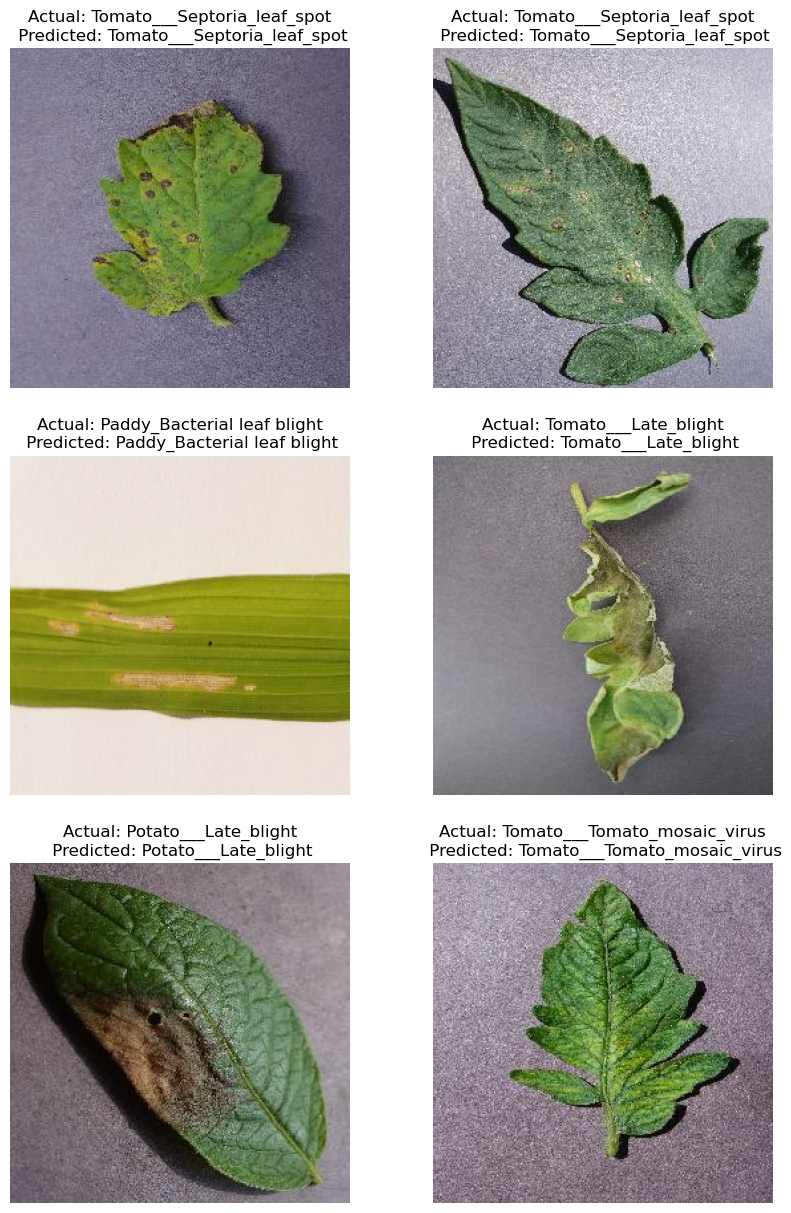

In [53]:
plt.figure(figsize=(10, 15))
for images, labels in testData.take(1):
    for i in range(6):
        ax = plt.subplot(3, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}")
        
        plt.axis("off")

In [43]:
class_names = testData.class_names
class_names

['Bean_angular_leaf_spot',
 'Bean_bean_rust',
 'Cauliflower_Alternaria_Leaf_Spot',
 'Cauliflower_Black_Rot',
 'Cauliflower_Cabbage aphid colony',
 'Cauliflower_Downy_Mildew',
 'Cauliflower_ring spot',
 'Paddy_Bacterial leaf blight',
 'Paddy_Brown spot',
 'Paddy_Leaf smut',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [44]:
import numpy as np
from PIL import Image
from tensorflow import keras


In [49]:
new_image = keras.preprocessing.image.load_img('E:\\8th semester\\CSE 4000 Thesis or Project\\Dataset\\disease_data\\Test\\Bean_bean_rust\\1 (435).jpg', target_size=(224, 224))
new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.0  # Normalize the image

1/1 [==============================] - 0s 54ms/step


	Predicted class: Bean_bean_rust


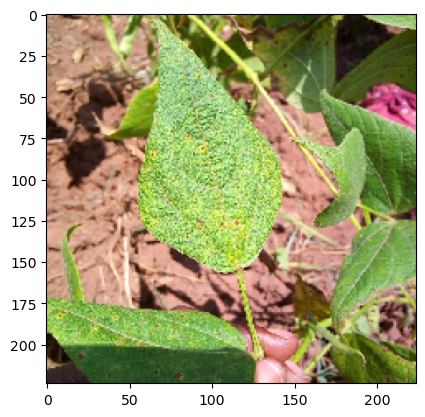

In [50]:
predictions = model.predict(np.expand_dims(new_image, axis=0))
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print("\n")
plt.imshow(new_image)
print(f"\tPredicted class: {predicted_class}")
#plt.axis("off")


In [51]:
#Cauliflower

if(predicted_class == 'Cauliflower_Downy_Mildew'):
    print("Disease Name: Cauliflower_Downy_Mildew \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(9 gm), Echo(11 gm), Follicur(9 gm)\n\nArea: 1 Satak \nWater volume: 3 Litter")
    
elif(predicted_class == 'Cauliflower_Alternaria_Leaf_Spot'):
    print("Disease Name: Cauliflower_Alternaria_Leaf_Spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(9 gm), Echo(11 gm), Follicur(9 gm)\n\nArea: 1 Satak \nWater volume: 3 Litter")
    
elif(predicted_class == 'Cauliflower_ring spot'):
    print("Disease Name: Cauliflower_ring spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(7 gm), Echo(9 gm), Follicur(7 gm), Tilt(9 gm)\n\n2) Metallex L-M\n   Trade Name: Ridomil Gold MZ(2 gm), Acrobat MZ(2 gm)\n\nArea: 1 Satak \nWater volume: 4 Litter")
    
elif(predicted_class == 'Cauliflower_Cabbage aphid colony'):
    print("Disease Name: Cauliflower_Cabbage aphid colony \nPesticide Name: \n1) Pyrethroids\n   Trade Name: Ambush(7 gm), Permethrin(9 gm), Beithriod: 7 gm, Isfinvalerate(9 gm)\n\nArea: 1 Satak \nWater volume: 4 Litter")
    
elif(predicted_class == 'Cauliflower_Black_Rot'):
    print("Disease Name: Cauliflower_Black_Rot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(7 gm), Echo(9 gm), Follicur(7 gm), Tilt(9 gm)\n\n2) Metallex L-M\n   Trade Name: Ridomil Gold MZ(2 gm), Acrobat MZ(2 gm)\n\nArea: 1 Satak \nWater volume: 3 Litter")
    
#Bean

elif(predicted_class == 'Bean_angular_leaf_spot'):
    print("Disease Name: Bean_angular_leaf_spot \nPesticide Name: \n1) Carbendazim\n   Trade Name: Derosal(3 ml), Bavistin(3 ml)\n\n2) Copper hydroxide\n   Trade Name: Kocide(5 ml), Champ(5 ml)\n\n3) Mancozeb\n   Trade Name: Manzate(16 mg), Dithane M-45(16 mg)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Bean_bean_rust'):
    print("Disease Name: Bean_bean_rust \nPesticide Name: \n1) Propiconazole\n   Trade Name: Tilt(2 ml), Banner MAXX(2 ml)\n\n2) Tebuconazole\n   Trade Name: Folicur(2 ml), Elite(2 ml)\n\n3) Trifloxystrobin\n   Trade Name: Cabrio(5 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
#Potato

elif(predicted_class == 'Potato___Late_blight'):
    print("Disease Name: Potato___Late_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(6 mg), Eco(8 gm), Manjat(6 mg), Follicur(6 gm)\n\n2) Mancozeb\n   Trade Name: Dithen M45(9 gm), Maneb(9 gm), Manjat 200(11 gm)\n\nArea: 1 Satak \nWater volume: 4 Litter")
    
elif(predicted_class == 'Potato___Early_blight'):
    print("Disease Name: Potato___Early_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(7 mg), Eco(9 gm), Manjat(7 mg), Follicur(7 gm)\n\n2) Pyraclostrobin\n   Trade Name: PreXor(3 ml), The headline(2 ml), Tilt Excel(2 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")

elif(predicted_class == 'Potato___healthy'):
    print("Threre is no Diseases")
    
#Paddy

elif(predicted_class == 'Paddy_Bacterial leaf blight'):
    print("Disease Name: Paddy_Bacterial leaf blight \nPesticide Name: \n1) Streptomycin\n   Trade Name: Agrimycin(1 gm), Streptomycin Sulphate(2 gm), Blasticidin(1 gm)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Paddy_Brown spot'):
    print("Disease Name: Paddy_Brown spot \nPesticide Name: \n1) Tricyclazole\n   Trade Name: Belliton(1 gm), Triphyrin(1 gm), Trizol(1 gm)\n\nArea: 1 Satak \nWater volume: 2 Litter")
    
elif(predicted_class == 'Paddy_Leaf smut'):
    print("Disease Name: Paddy_Leaf Smart \nPesticide Name: \n1) Carbendazim\n   Trade Name: Bevistin(1 gm), Vitavex(1 gm), Fundazole(1 gm)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
#Tomato

elif(predicted_class == 'Tomato___Bacterial_spot'):
    print("Disease Name: Tomato___Bacterial_spot \nPesticide Name: \n1) Copper hydroxide\n   Trade Name: Kocide(10 ml), Champ(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Streptomycin\n   Trade Name: Agri-mycin 17(10 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___Early_blight'):
    print("Disease Name: Tomato___Early_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Azoxystrobin\n   Trade Name: Quadris(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___Late_blight'):
    print("Disease Name: Tomato___Late_blight \nPesticide Name: \n1) Copper hydroxide\n   Trade Name: Kocide(10 ml), Champ(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Mefenoxam\n   Trade Name: Ridomil Gold MZ(10 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___Leaf_Mold'):
    print("Disease Name: Tomato___Early_blight \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Tebuconazole\n   Trade Name: Luna Experience(5 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___Septoria_leaf_spot'):
    print("Disease Name: Tomato___Septoria_leaf_spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Azoxystrobin\n   Trade Name: Quadris(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___Spider_mites Two-spotted_spider_mite'):
    print("Disease Name: Tomato___Spider_mites Two-spotted_spider_mite \nPesticide Name: \n1) Abamectin\n   Trade Name: Avid(1 ml)\n\n2) Bifenthrin\n   Trade Name: Brigade(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___Target_Spot'):
    print("Disease Name: Tomato___Target_Spot \nPesticide Name: \n1) Chlorothalonil\n   Trade Name: Bravo(10 ml), Daconil(10 ml)\n\n2) Mancozeb\n   Trade Name: Manzate(16 gm), Dithane M-45(16 gm)\n\n3) Azoxystrobin\n   Trade Name: Quadris(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___Tomato_mosaic_virus'):
    print("Disease Name: Tomato___Tomato_mosaic_virus \nPesticide Name: \n1) Abamectin\n   Trade Name: Avid(1 ml)\n\n2) Bifenthrin\n   Trade Name: Brigade(3 ml)\n\nArea: 1 Satak \nWater volume: 1 Litter")
    
elif(predicted_class == 'Tomato___healthy'):
    print("There is no Diseases")
    

Disease Name: Bean_bean_rust 
Pesticide Name: 
1) Propiconazole
   Trade Name: Tilt(2 ml), Banner MAXX(2 ml)

2) Tebuconazole
   Trade Name: Folicur(2 ml), Elite(2 ml)

3) Trifloxystrobin
   Trade Name: Cabrio(5 ml)

Area: 1 Satak 
Water volume: 1 Litter
